In [1]:
import pandas as pd
import os

We first focus on the daily usage of Chinese-related racial slurs on Twitter from 2020/1 to 2020/12

### Read in all the csv files and convert them into data frames

In [2]:
folder_1_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-01-slur'
folder_2_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-02-slur'
folder_3_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-03-slur'
folder_4_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-04-slur'
folder_5_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-05-slur'
folder_6_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-06-slur'
folder_7_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-07-slur'
folder_8_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-08-slur'
folder_9_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-09-slur'
folder_10_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-10-slur'
folder_11_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-11-slur'
folder_12_path = '/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/twitter data/2020-12-slur'

In [3]:
files_1 = os.listdir(folder_1_path)
files_2 = os.listdir(folder_2_path)
files_3 = os.listdir(folder_3_path)
files_4 = os.listdir(folder_4_path)
files_5 = os.listdir(folder_5_path)
files_6 = os.listdir(folder_6_path)
files_7 = os.listdir(folder_7_path)
files_8 = os.listdir(folder_8_path)
files_9 = os.listdir(folder_9_path)
files_10 = os.listdir(folder_10_path)
files_11 = os.listdir(folder_11_path)
files_12 = os.listdir(folder_12_path)

In [4]:
def create_df(files, folder_path):
    dfs = {}
    for file in files:
        df = pd.read_csv(os.path.join(folder_path, file))
        dfs[file[:-4]] = df
    return dfs

Each dfs is a dictionary (representing a month), key is the date and value is the DataFrame correspoonding to each day in that month

In [8]:
dfs_1 = create_df(files_1, folder_1_path)
dfs_2 = create_df(files_2, folder_2_path)
dfs_3 = create_df(files_3, folder_3_path)
dfs_4 = create_df(files_4, folder_4_path)
dfs_5 = create_df(files_5, folder_5_path)
dfs_6 = create_df(files_6, folder_6_path)
dfs_7 = create_df(files_7, folder_7_path)
dfs_8 = create_df(files_8, folder_8_path)
dfs_9 = create_df(files_9, folder_9_path)
dfs_10 = create_df(files_10, folder_10_path)
dfs_11 = create_df(files_11, folder_11_path)
dfs_12 = create_df(files_12, folder_12_path)

### Calculate the size of my twitter dataset and visualize daily tweet count on monthly basis

In [9]:
def day_count(dfs):
    ''' 
    Helper function to calculate the number of tweets in each day 
    in a given month DataFrame
    '''

    monthly_count = []
    for key, values in dfs.items():
        date = pd.to_datetime(key).strftime('%m-%d')
        count = values.shape[0]
        monthly_count.append((date, count))
    sorted_monthly_count = sorted(monthly_count, key=lambda x: x[0])

    return sorted_monthly_count

Each count variable is a list of tuples representing the number of scraped tweets in that month.
Each tuple in the list has 2 elements: date and number of tweets on that day

In [11]:
jan_count = day_count(dfs_1)
feb_count = day_count(dfs_2)
mar_count = day_count(dfs_3)
apr_count = day_count(dfs_4)
may_count = day_count(dfs_5)
jun_count = day_count(dfs_6)
jul_count = day_count(dfs_7)
aug_count = day_count(dfs_8)
sep_count = day_count(dfs_9)
oct_count = day_count(dfs_10)
nov_count = day_count(dfs_11)
dec_count = day_count(dfs_12)

In [13]:
print(jan_count)

[('01-01', 442), ('01-02', 590), ('01-03', 719), ('01-04', 659), ('01-05', 506), ('01-06', 524), ('01-07', 691), ('01-08', 884), ('01-09', 856), ('01-10', 703), ('01-11', 604), ('01-12', 643), ('01-13', 819), ('01-14', 735), ('01-15', 727), ('01-16', 946), ('01-17', 1001), ('01-18', 994), ('01-19', 679), ('01-20', 638), ('01-21', 667), ('01-22', 771), ('01-23', 709), ('01-24', 718), ('01-25', 579), ('01-26', 679), ('01-27', 597), ('01-28', 673), ('01-29', 938), ('01-30', 840), ('01-31', 995)]


Calculate the total number of scraped tweets in each month

In [21]:
monthly_count_lst = []
for counts in [jan_count, feb_count, mar_count, apr_count, may_count, jun_count, jul_count, aug_count, sep_count, oct_count, nov_count, dec_count]:
    monthly_count = 0
    for (_, count) in counts:
        monthly_count += count
    monthly_count_lst.append(monthly_count)
monthly_count_lst

[22526,
 20509,
 23579,
 27315,
 27042,
 26638,
 27602,
 24554,
 23676,
 27015,
 25161,
 28372]

When examning the csv file, I notice a relatively large amount of tweets including the keyword "chyna" refer to the famous model "Blac Chyna," which means I need to investigate the impact of this public figure on my dataset 

In [29]:
def calculate_blac_chyna_count(dfs):
    ''' 
    Helper function to calculate the number of tweets including the keywords blac chyna
    '''

    blac_chyna_count = 0
    for _, df in dfs.items():
        text_lower = df['Text'].str.lower()
        username_lower = df['Username'].str.lower()
        blac_chyna_count += (text_lower.str.contains('blac chyna')).sum()
        blac_chyna_count += (username_lower.str.contains('blac chyna')).sum()

    return blac_chyna_count

Call the above function to check how many tweets contain 'blac chyna' or 'Blac Chyna'
Decide if we need to remove tweets of these keywords

In [30]:
jan_blac = calculate_blac_chyna_count(dfs_1)
feb_blac = calculate_blac_chyna_count(dfs_2)
mar_blac = calculate_blac_chyna_count(dfs_3)
apr_blac = calculate_blac_chyna_count(dfs_4)
may_blac = calculate_blac_chyna_count(dfs_5)
jun_blac = calculate_blac_chyna_count(dfs_6)
jul_blac = calculate_blac_chyna_count(dfs_7)
aug_blac = calculate_blac_chyna_count(dfs_8)
sep_blac = calculate_blac_chyna_count(dfs_9)
oct_blac = calculate_blac_chyna_count(dfs_10)
nov_blac = calculate_blac_chyna_count(dfs_11)
dec_blac = calculate_blac_chyna_count(dfs_12)

blac_counts = jan_blac, feb_blac, mar_blac, apr_blac, may_blac, jun_blac, jul_blac, aug_blac, sep_blac, oct_blac, nov_blac, dec_blac
print('Number of tweets containing blac chyna in each month = ', blac_counts)
print('Total number of tweets containing blac chyna = ', sum(blac_counts))

Number of tweets containing blac chyna in each month =  (3030, 3479, 1557, 3357, 1751, 1383, 2432, 1257, 1833, 1449, 1191, 828)
Total number of tweets containing blac chyna =  23547


In [31]:
sum(monthly_count_lst) # number of all scraped tweets

303989

In [32]:
minus_chyna_lst = []
for x, y in zip(monthly_count_lst, blac_counts): 
    minus_chyna = x - y
    minus_chyna_lst.append(minus_chyna)
print('Number of tweets excluding blac chyna in each month = ', minus_chyna_lst)
print('Total number of tweets excluding blac chyna = ', sum(minus_chyna_lst))

Number of tweets excluding blac chyna in each month =  [19496, 17030, 22022, 23958, 25291, 25255, 25170, 23297, 21843, 25566, 23970, 27544]
Total number of tweets excluding blac chyna =  280442


After some calculation, I found that "blac chyna" and "Blac Chyna" tweets comprise of 7 percent of the total tweets,
which means by dropping these tweets should not cause a huge impact on my dataset. I will drop them below.

In [33]:
dfs_1

{'2020-01-08':                       Datetime             Tweet Id       Username  \
 0    2020-01-08 23:54:31+00:00  1215059236725706757  ItsEstaFiesta   
 1    2020-01-08 23:53:46+00:00  1215059047688306688    antuanaziaK   
 2    2020-01-08 23:51:08+00:00  1215058385084743684      alexjketz   
 3    2020-01-08 23:50:05+00:00  1215058121976156161     TheHype984   
 4    2020-01-08 23:46:38+00:00  1215057252597600256        quaaaK_   
 ..                         ...                  ...            ...   
 879  2020-01-08 00:03:22+00:00  1214699076140310529        FS_Gook   
 880  2020-01-08 00:03:20+00:00  1214699066799591424      Ahniyahsb   
 881  2020-01-08 00:02:30+00:00  1214698857474543616        FS_Gook   
 882  2020-01-08 00:01:21+00:00  1214698568352706561     ___xrozzie   
 883  2020-01-08 00:01:03+00:00  1214698493186641925      xo_Ginaaa   
 
                                                   Text  
 0    Meghan Markle did what y’all though Blac Chyna...  
 1    I only hav

In [21]:
# for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
#     for df in dfs.values():
#         df = df[~df['Text'].str.contains('blac chyna')]
#         df = df[~df['Text'].str.contains('Blac Chyna')]
#         df = df[~df['Username'].str.contains('blac chyna')]
#         df = df[~df['Username'].str.contains('Blac Chyna')]
#         df = df.reset_index()

In [34]:
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for key, df in dfs.items():
        drop_index = df[df['Text'].str.contains('blac chyna') | df['Text'].str.contains('Blac Chyna') | df['Username'].str.contains('blac chyna') | df['Username'].str.contains('Blac Chyna')].index
        df.drop(index=drop_index, inplace=True)
        df.reset_index(drop=True, inplace=True)

In [35]:
dfs_1

{'2020-01-08':                       Datetime             Tweet Id         Username  \
 0    2020-01-08 23:53:46+00:00  1215059047688306688      antuanaziaK   
 1    2020-01-08 23:51:08+00:00  1215058385084743684        alexjketz   
 2    2020-01-08 23:46:38+00:00  1215057252597600256          quaaaK_   
 3    2020-01-08 23:42:49+00:00  1215056294035501056  lightskin_chink   
 4    2020-01-08 23:42:06+00:00  1215056112015290373      ambb_mariee   
 ..                         ...                  ...              ...   
 601  2020-01-08 00:03:22+00:00  1214699076140310529          FS_Gook   
 602  2020-01-08 00:03:20+00:00  1214699066799591424        Ahniyahsb   
 603  2020-01-08 00:02:30+00:00  1214698857474543616          FS_Gook   
 604  2020-01-08 00:01:21+00:00  1214698568352706561       ___xrozzie   
 605  2020-01-08 00:01:03+00:00  1214698493186641925        xo_Ginaaa   
 
                                                   Text  
 0    I only have Chyna and Janiya to send my weir

In [40]:
new_jan_count = day_count(dfs_1)
new_feb_count = day_count(dfs_2)
new_mar_count = day_count(dfs_3)
new_apr_count = day_count(dfs_4)
new_may_count = day_count(dfs_5)
new_jun_count = day_count(dfs_6)
new_jul_count = day_count(dfs_7)
new_aug_count = day_count(dfs_8)
new_sep_count = day_count(dfs_9)
new_oct_count = day_count(dfs_10)
new_nov_count = day_count(dfs_11)
new_dec_count = day_count(dfs_12)

In [41]:
new_monthly_count_lst = []
for counts in [new_jan_count, new_feb_count, new_mar_count, new_apr_count, new_may_count, new_jun_count, 
               new_jul_count, new_aug_count, new_sep_count, new_oct_count, new_nov_count, new_dec_count]:
    monthly_count = 0
    for (_, count) in counts:
        monthly_count += count
    new_monthly_count_lst.append(monthly_count)
print('New monthly counts of tweets = ', new_monthly_count_lst)
print('New total counts of tweets', sum(new_monthly_count_lst))

New monthly counts of tweets =  [19759, 17313, 22158, 24312, 25490, 25392, 25438, 23409, 22026, 25700, 24060, 27606]
New total counts of tweets 282663


In [44]:
import matplotlib.pyplot as plt

In [45]:
def plot_daily(month_count):
    plt.figure(figsize=(20, 7))
    days = [t[0] for t in month_count]
    counts = [t[1] for t in month_count]
    plt.plot(days, counts)
    plt.title('Daily Tweet Counts')
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.show()

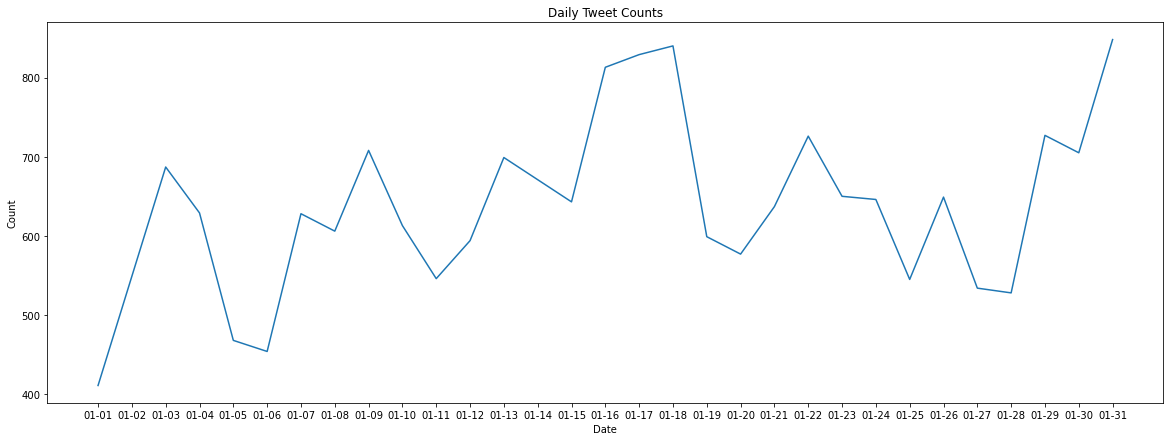

In [46]:
plot_daily(new_jan_count) # Jan tweet counts

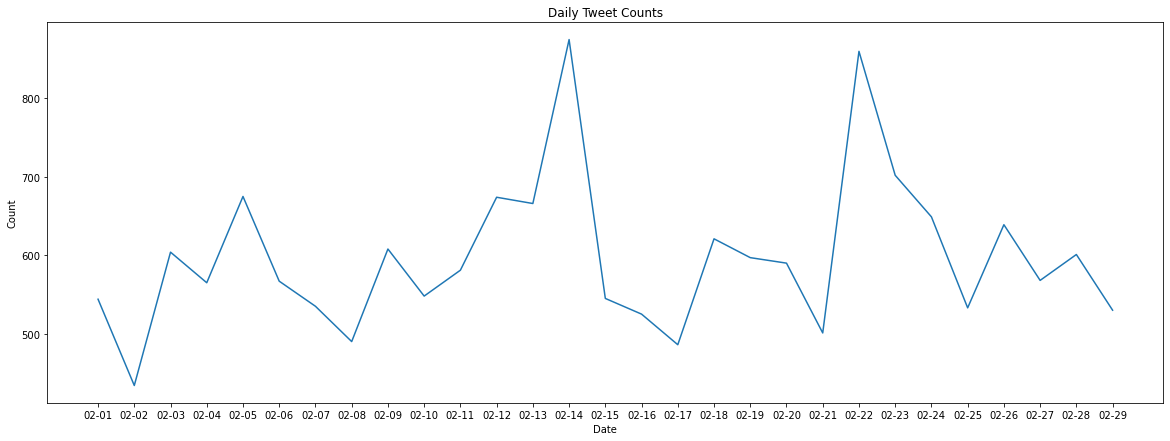

In [47]:
plot_daily(new_feb_count) # Feb tweet Count

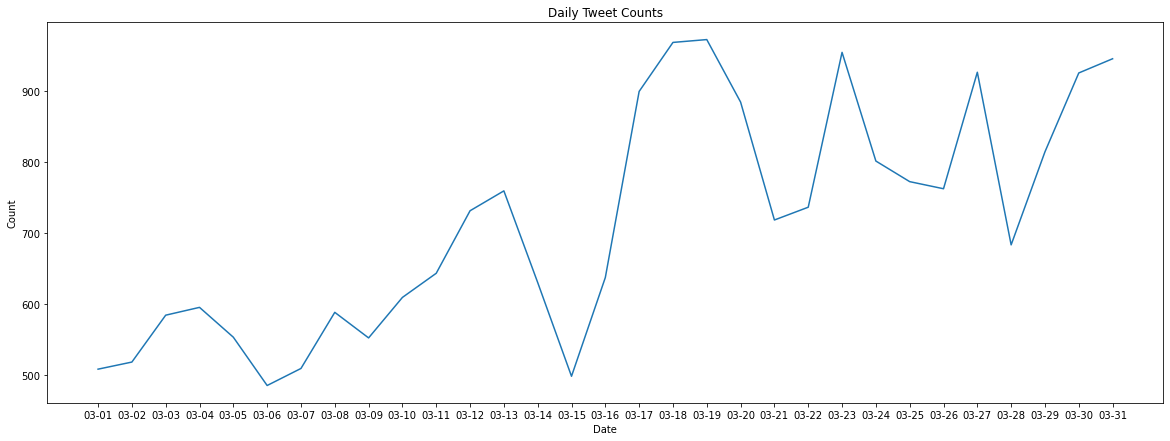

In [48]:
plot_daily(new_mar_count) # March tweet count

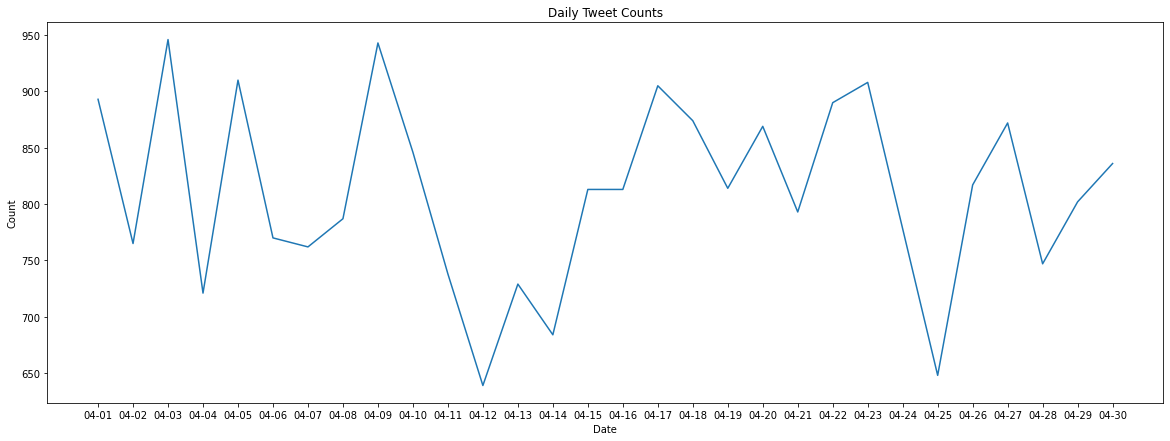

In [49]:
plot_daily(new_apr_count) # April tweet count

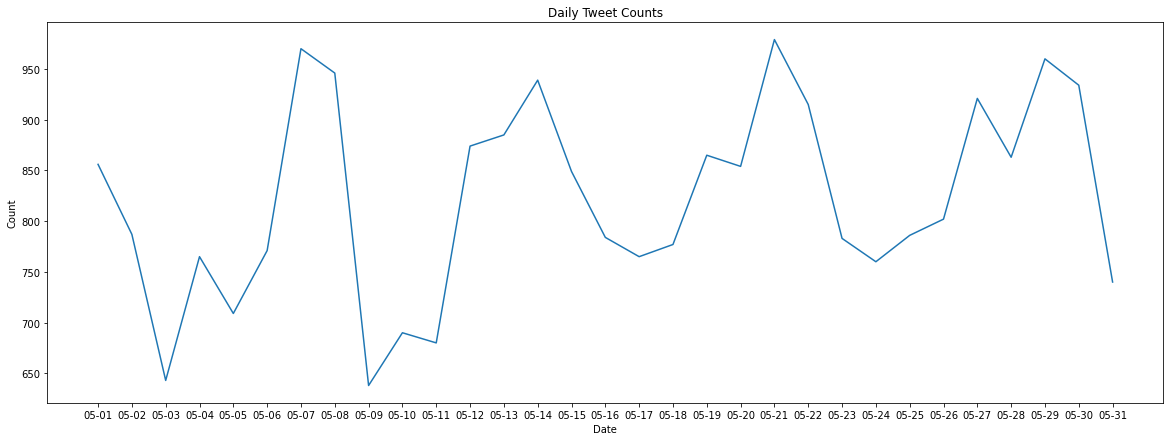

In [50]:
plot_daily(new_may_count) # May tweet count

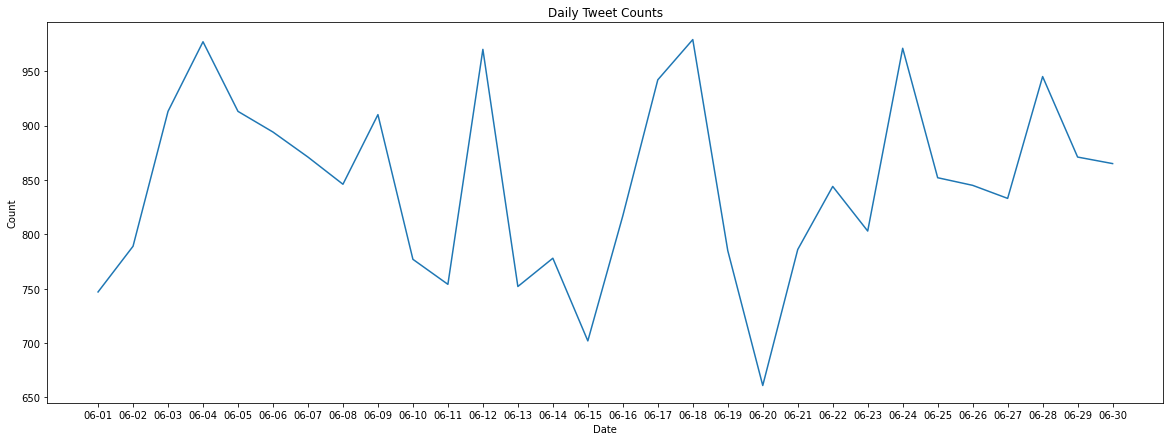

In [51]:
plot_daily(new_jun_count) # June tweet count

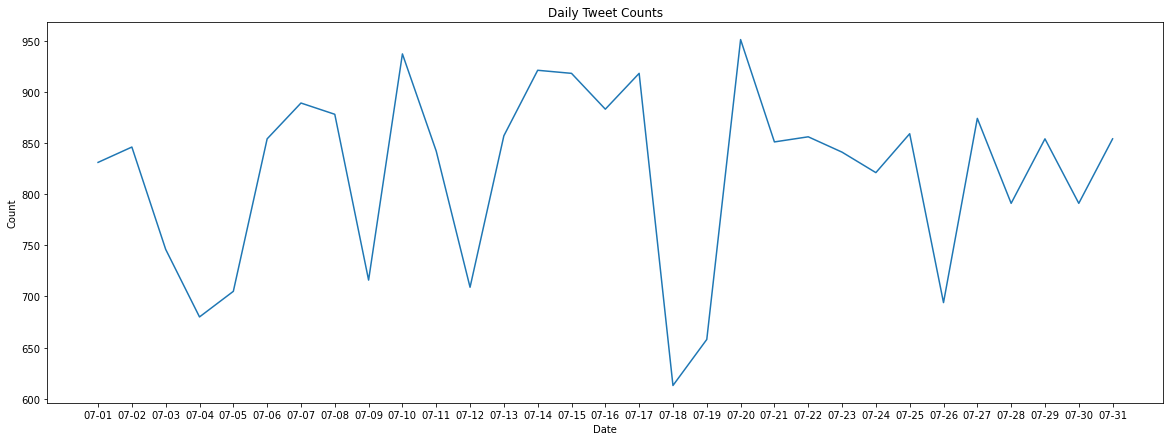

In [52]:
plot_daily(new_jul_count) # July tweet count

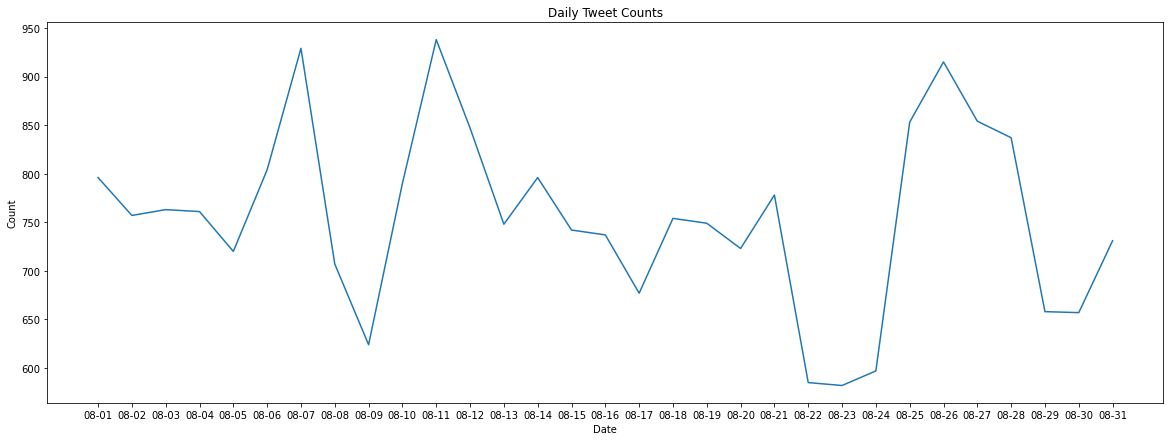

In [53]:
plot_daily(new_aug_count) # August tweet count

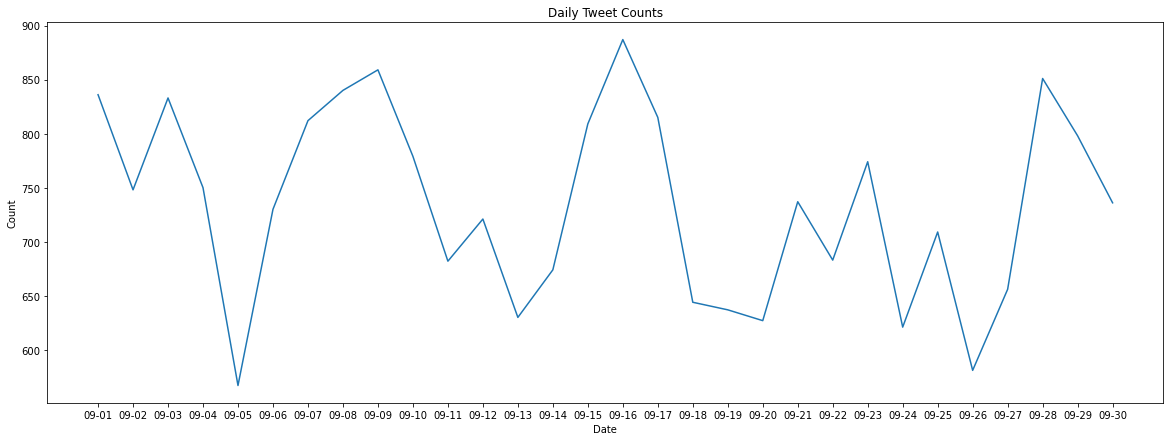

In [54]:
plot_daily(new_sep_count) # September tweet count

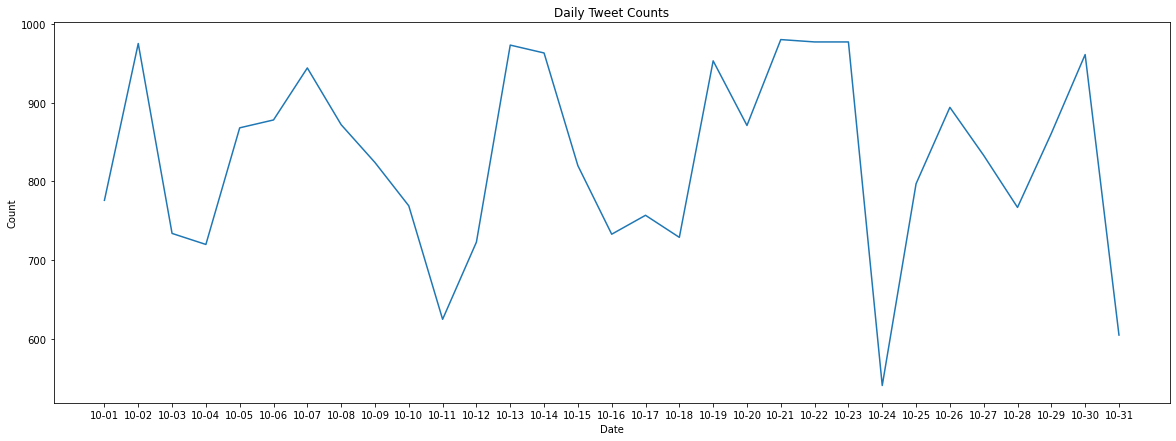

In [55]:
plot_daily(new_oct_count) # Oct tweet count

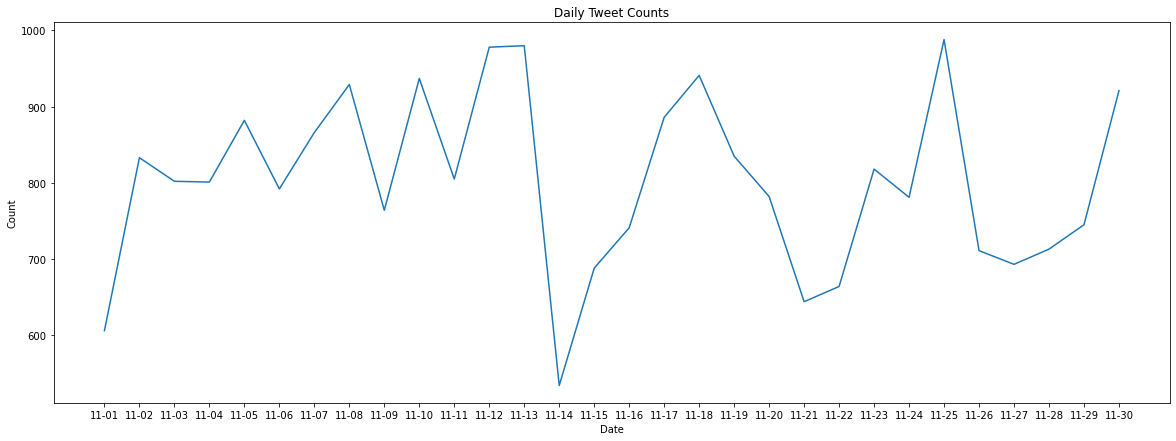

In [56]:
plot_daily(new_nov_count) # Nov tweet count

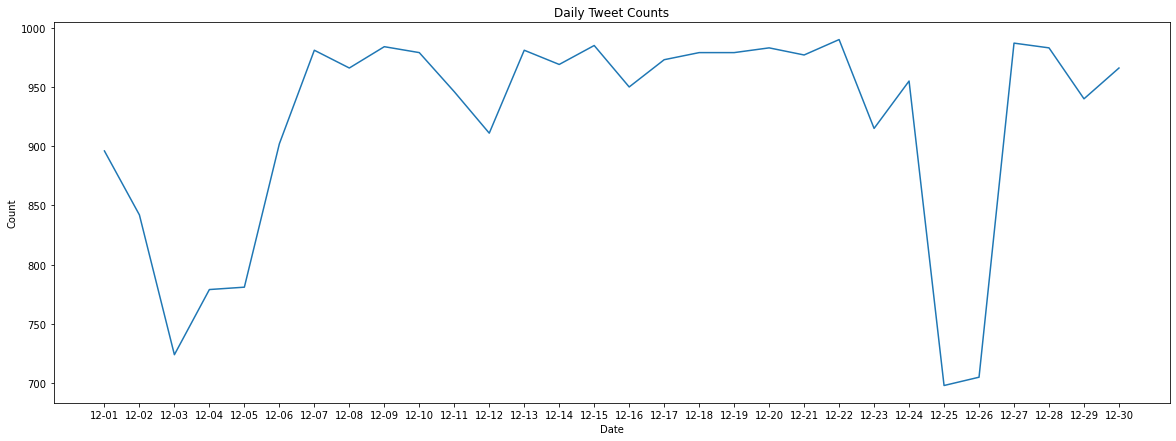

In [57]:
plot_daily(new_dec_count) # Notice that even after blac chyna, Dec is still very unusual and high

### Visualize daily tweet counts throughout the year of 2020

In [59]:
new_monthly_count_lst

[19759,
 17313,
 22158,
 24312,
 25490,
 25392,
 25438,
 23409,
 22026,
 25700,
 24060,
 27606]

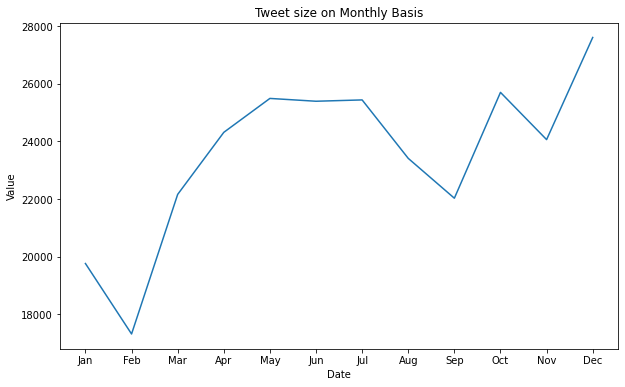

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, new_monthly_count_lst)
plt.title("Tweet size on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [61]:
all_counts = new_jan_count + new_feb_count + new_mar_count + new_apr_count + new_may_count + new_jun_count \
        + new_jul_count + new_aug_count + new_sep_count + new_oct_count + new_nov_count + new_dec_count
len(all_counts)

365

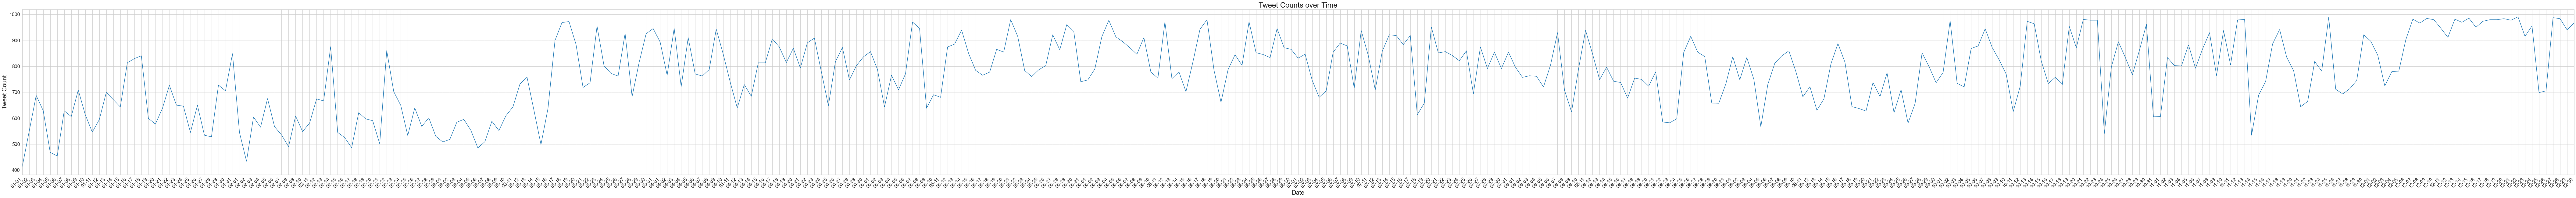

In [62]:
import seaborn as sns
all_dates = [t[0] for t in all_counts]
all_tweet_counts = [t[1] for t in all_counts]

plt.figure(figsize=(150, 10))

sns.set_style('whitegrid')
sns.lineplot(x=all_dates, y=all_tweet_counts)

plt.xlabel('Date', fontsize=20)
plt.ylabel('Tweet Count', fontsize=20)
plt.title('Tweet Counts over Time', fontsize=24)

plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)

plt.xlim(min(all_dates), max(all_dates))

plt.show()

### Data Preprocess -- Cleaning

Although I collected tweets based on racial slurs used and recommended by other researchers in their studies,
it is possible that the keywords have a different meaning and hence the tweets I collected are not in fact Sinophobic. To address this issue, I will conduct a series of sentiment analysis to find the negative sentiment tweets

In [63]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/itsyuzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
def preprocess_tweet(tweet):
    ''' 
    Helper function to preprocess a given tweet for future sentiment analysis
    '''

    tweet = tweet.lower() # Convert to lowercase
    tweet = re.sub(r'http\S+', '', tweet) # Remove URLs
    tweet = re.sub(r'[^\w\s]', '', tweet) # Remove punctuation
    tweet = ' '.join([word for word in tweet.split() if word not in stop_words])
    tweet = lemmatizer.lemmatize(tweet)
    tweet = stemmer.stem(tweet)

    return tweet

In [65]:
# Firstly, preprocess January and take a look at the preprocessed DataFrame of Jan 8th
for key, df in dfs_1.items():
    df['Preprocessed Text'] = df["Text"].apply(preprocess_tweet)
dfs_1['2020-01-08']

,Datetime,Tweet Id,Username,Text,Preprocessed Text
0,2020-01-08 23:53:46+00:00,1215059047688306688,antuanaziaK,I only have Chyna and Janiya to send my weird ...,chyna janiya send weird video
1,2020-01-08 23:51:08+00:00,1215058385084743684,alexjketz,"@normmacdonald But did he ever say ""chink"" cuz...",normmacdonald ever say chink cuz hed fired immedi
2,2020-01-08 23:46:38+00:00,1215057252597600256,quaaaK_,@LilCutBoyCHINK @imake_emtweet chink she’s emb...,lilcutboychink imake_emtweet chink shes embarrass
3,2020-01-08 23:42:49+00:00,1215056294035501056,lightskin_chink,@ambb_mariee Let me kno when you do so I can r...,ambb_mariee let kno report well im mess
4,2020-01-08 23:42:06+00:00,1215056112015290373,ambb_mariee,@lightskin_chink Like nbs! 😂 they be ass backw...,lightskin_chink like nbs ass backwards im call...
...,...,...,...,...,...
601,2020-01-08 00:03:22+00:00,1214699076140310529,FS_Gook,Lmfaooo lets get it,lmfaooo lets get
602,2020-01-08 00:03:20+00:00,1214699066799591424,Ahniyahsb,@jefe_chink Happy birthday oldhead🥳😂,jefe_chink happy birthday oldhead
603,2020-01-08 00:02:30+00:00,1214698857474543616,FS_Gook,@sebass787 We got a real nice team man. Good r...,sebass787 got real nice team man good rotation...
604,2020-01-08 00:01:21+00:00,1214698568352706561,___xrozzie,@jefe_chink Happy bday,jefe_chink happy bday


In [66]:
# Clean and preprocess all data frames corresponding to each month of tweet, already preprocessed Jan in the above section
for dfs in [dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for key, df in dfs.items():
        df['Preprocessed Text'] = df["Text"].apply(preprocess_tweet)

In [67]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def sentiment_score(df):
    ''' 
    Helper function to calculate the polarity score as measurement of tweet sentiment for each month data frame.
    Record the negative scores because my goal is Sinophobic sentiment which is essentally negative; 
    also record the overall indicator of compound score

    Return nothing but change the original data frame passed in
    '''

    # pol_scores = []
    neg_scores = []
    com_scores = []

    for _, values in df['Preprocessed Text'].iteritems():
        scores = sia.polarity_scores(values)
        # pol_scores.append(scores)
        neg_scores.append(scores['neg'])
        com_scores.append(scores['compound'])

    # df['Polarity Scores'] = pol_scores
    df['Negative Scores'] = neg_scores
    df['Compound Scores'] = com_scores

In [68]:
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    for _, df in dfs.items():
        df = sentiment_score(df)

In [71]:
dfs_3['2020-03-15'] # Example to take a look


,Datetime,Tweet Id,Username,Text,Preprocessed Text,Negative Scores,Compound Scores
0,2020-03-15 23:59:45+00:00,1239340543202807815,Chink_z,"I’m bouta be in the gym like crazy, watchhh",im bouta gym like crazy watchhh,0.27,0.0258
1,2020-03-15 23:59:23+00:00,1239340447484477445,AKLionMusic,@tiggertastic_ The LMS Alexa? I pulled a seco...,tiggertastic_ lms alexa pulled second rr chyna...,0.00,0.2023
2,2020-03-15 23:50:39+00:00,1239338252861136897,nolimitzae__,Glad ion got the mindset of a gook 😎😄,glad ion got mindset gook,0.00,0.4588
3,2020-03-15 23:48:10+00:00,1239337625368084486,chyna______,I don’t feel well.,dont feel wel,0.00,0.0000
4,2020-03-15 23:44:59+00:00,1239336824197255168,swaggabankz,@peenicole_23 Lmao gook,peenicole_23 lmao gook,0.00,0.5994
...,...,...,...,...,...,...,...
493,2020-03-15 00:29:16+00:00,1238985579393503232,Cal_sssteve,@tinmantd @StaceyPrussman You drink when you c...,tinmantd staceyprussman drink chink,0.00,0.0000
494,2020-03-15 00:25:13+00:00,1238984564015394816,CampaignCoins,This is a lovely video by @ShaunSunday_Art tak...,lovely video shaunsunday_art taking look coins...,0.00,0.7184
495,2020-03-15 00:18:38+00:00,1238982903708569600,MV_MMA,@war0890 @datbitchsophia Chyna sued the family...,war0890 datbitchsophia chyna sued family name ...,0.00,0.0000
496,2020-03-15 00:13:28+00:00,1238981605986836480,Clemsonbloke,"@Wilkes85 He didn't look high to me, no chink ...",wilkes85 didnt look high chink ey,0.00,0.0000


In [72]:
from statsmodels.tsa.seasonal import seasonal_decompose

Example of computing a single day's sentiment compound score

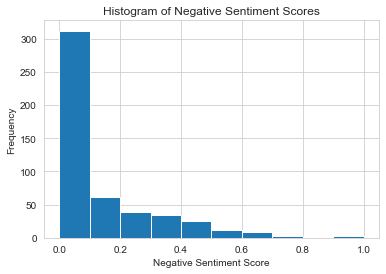

In [73]:
# Extract negative sentiment scores into a list
negative_scores_try = dfs_3['2020-03-15']['Negative Scores'].tolist()

# Create histogram using matplotlib
plt.hist(negative_scores_try, bins=10)

# Set x-axis label
plt.xlabel('Negative Sentiment Score')

# Set y-axis label
plt.ylabel('Frequency')

# Set plot title
plt.title('Histogram of Negative Sentiment Scores')

# Show plot
plt.show()

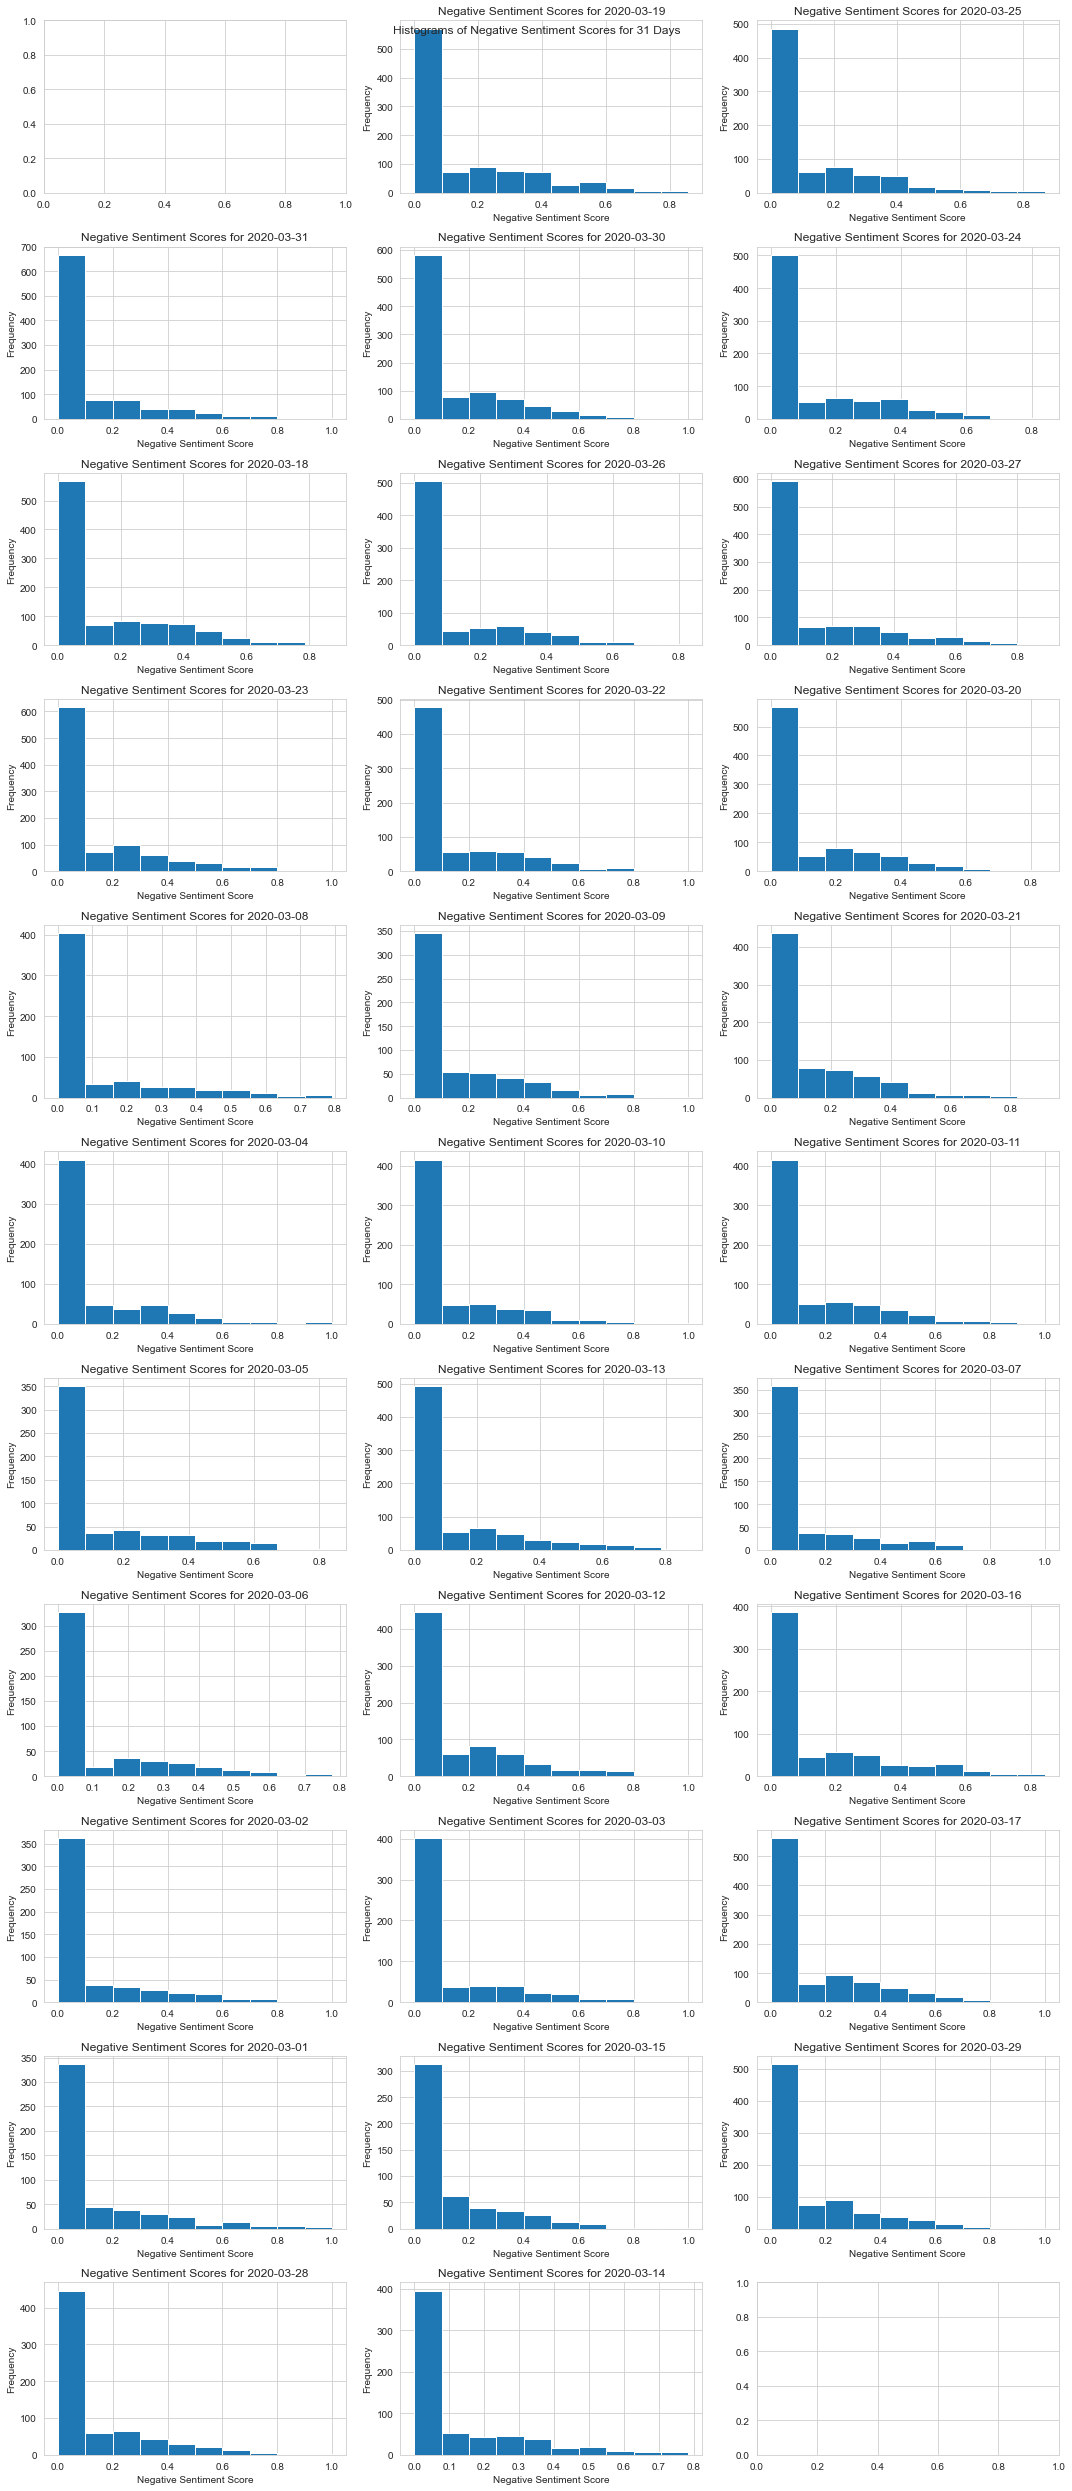

In [74]:
fig, axs = plt.subplots(nrows=11, ncols=3, figsize=(15, 35))
counter = 0
# Loop through data files and subplots
for key, df in dfs_3.items():
    # Extract negative sentiment scores into a list
    counter += 1
    negative_scores = df['Negative Scores'].tolist()

    # Create histogram on subplot
    axs[counter // 3, counter % 3].hist(negative_scores, bins=10)

    # Set subplot title
    axs[counter // 3, counter % 3].set_title(f"Negative Sentiment Scores for {key}")

    # Set x-axis label
    axs[counter // 3, counter % 3].set_xlabel('Negative Sentiment Score')

    # Set y-axis label
    axs[counter // 3, counter % 3].set_ylabel('Frequency')

fig.suptitle('Histograms of Negative Sentiment Scores for 31 Days')

fig.tight_layout()

plt.show()

## Time Series Analysis

1. Obtain a time series object representing the number of Sinophobic tweets corresponding each month, use 01-01, 02-01, ..., 12-01 by convention

In [79]:
ts_df = pd.DataFrame(new_monthly_count_lst, columns=['tweet_counts'])

# Set the index of the DataFrame to be a DatetimeIndex of the first day of each month
ts_df.index = pd.date_range(start='2020-01-01', periods=len(new_monthly_count_lst), freq='MS')

print(ts_df)

            tweet_counts
2020-01-01         19759
2020-02-01         17313
2020-03-01         22158
2020-04-01         24312
2020-05-01         25490
2020-06-01         25392
2020-07-01         25438
2020-08-01         23409
2020-09-01         22026
2020-10-01         25700
2020-11-01         24060
2020-12-01         27606


2. Visualize the time series: Create a line plot to visualize the monthly Sinophobic tweet counts over time, which provides the overall trend and seasonality in the data.

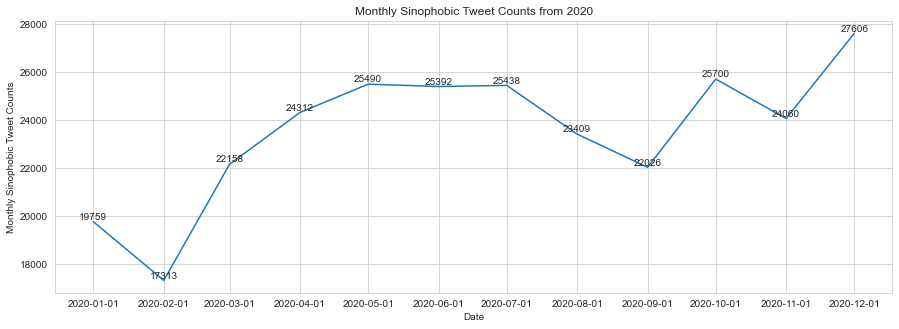

In [90]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(ts_df.index, ts_df.tweet_counts)
plt.xlabel('Date')
plt.ylabel('Monthly Sinophobic Tweet Counts')
plt.title('Monthly Sinophobic Tweet Counts from 2020')
for date, count in ts_df.iterrows():
    ax.text(date, count.tweet_counts, str(count.tweet_counts), ha='center', va='bottom')
ax.set_xticks(ts_df.index)
plt.show()

3. Check for stationarity: Ensure the above time series object has consistent statistical properties overtime

3.1 Qualitative Test: diagnose autocorrelation in a time series

The ACF measures the correlation between a time series and its own lagged values at different lags. The ACF plot shows the correlation coefficients for each lag, with the correlation coefficients on the y-axis and the lags on the x-axis. A significant autocorrelation at a given lag suggests that the value at that lag is related to the value at the current time point.

The PACF, on the other hand, measures the correlation between a time series and its lagged values after accounting for the correlation with the intervening lags. In other words, it measures the direct effect of a specific lag on the current value, while controlling for the effects of the other lags. The PACF plot also shows the correlation coefficients for each lag, with the correlation coefficients on the y-axis and the lags on the x-axis.

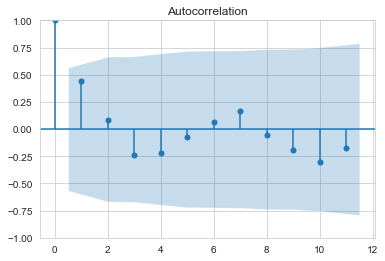

/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


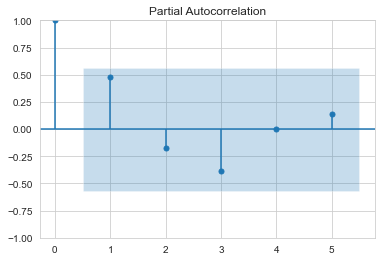

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plot_acf(ts_df.tweet_counts)
plt.show()

# Plot PACF
plot_pacf(ts_df, lags=5)
# from statsmodels.tsa.stattools import pacf

# pacf_values = pacf(ts_df.tweet_counts, nlags=5)
plt.show()

An ACF plot that oscillates between negative and positive y-values indicates the presence of alternating positive and negative autocorrelations. This suggests that the time series may have a seasonal pattern or a cyclic pattern, which means that the values repeat after certain intervals of time. The slight enlarging blue shaded region indicates that the autocorrelations are decreasing slowly as the lags increase.

An oscillating PACF plot with a rectangular-shaped blue shaded region suggests that there is significant autocorrelation at certain lags, but the correlation is not strong enough to affect the adjacent lags. 

Together, these plots suggest that the time series data is non-stationary and exhibits seasonality or periodicity. The next step would be to try to identify and remove any seasonality or trend in the data to make it stationary.

3.2 The autocorrelation function (ACF) and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [101]:
import statsmodels.api as sm

# Conduct ACF test
acf_test = sm.tsa.stattools.acf(ts_df.tweet_counts, nlags=20, fft=False)
print(acf_test)

# Conduct KPSS test
kpss_test = sm.tsa.stattools.kpss(ts_df.tweet_counts, regression='c')
print(kpss_test)

ImportError: cannot import name '__version__' from 'statsmodels._version' (/Users/itsyuzhou/opt/anaconda3/lib/python3.9/site-packages/statsmodels/_version.py)

### 1. Rolling Means
The rolling mean can be useful for smoothing out the noise in a time series and identifying trends or patterns in the data.

In [161]:
rolling_mean = dfs_6['2020-06-15']['Compound Scores'].rolling(window=5).mean()

In [167]:
rolling_mean

Datetime
2020-06-15 23:56:15+00:00         NaN
2020-06-15 23:55:58+00:00         NaN
2020-06-15 23:55:34+00:00         NaN
2020-06-15 23:55:25+00:00         NaN
2020-06-15 23:49:31+00:00         NaN
                               ...   
2020-06-15 00:03:44+00:00    0.173600
2020-06-15 00:03:29+00:00    0.224986
2020-06-15 00:01:28+00:00    0.224986
2020-06-15 00:01:00+00:00    0.084600
2020-06-15 00:00:42+00:00    0.031786
Name: Compound Scores, Length: 737, dtype: float64

In [166]:
rolling_mean.iloc[-1]

0.03178571428571429

Autocorrelation is a statistical concept that measures the linear relationship between lagged values of a time series. Autocorrelation measures how well the current value of a time series is related to its past values at different lags.

In the context of sentiment analysis, autocorrelation of compound scores measures the linear relationship between the sentiment of a tweet at a given time point and the sentiment of the tweet at previous time points. If the autocorrelation is high, it means that the sentiment of a tweet at a given time point is highly correlated with the sentiment of the tweet at previous time points.

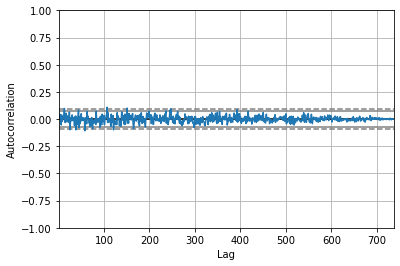

In [163]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(dfs_6['2020-06-15']['Compound Scores'])
plt.show()

Compute the rolling mean of each day's tweet

In [191]:
def day_rol_mean(dfs):
    ''' 
    Helper function to get each day's rolling mean in the end in a given month DataFrame
    '''
    
    ultimate_rol_mean_lst = []
    
    for _, df in dfs.items():
        rolling_mean = df.rolling(window=7).mean()
        ultimate_rol_mean = rolling_mean.iloc[-1]['Compound Scores']
        ultimate_rol_mean_lst.append(ultimate_rol_mean)
    
    return ultimate_rol_mean_lst


In [185]:
ex_df = dfs_10['2020-10-03']
rolling_mean = ex_df.rolling(window=7).mean()
ultimate_rol_mean = rolling_mean.iloc[-1]['Compound Scores']
ultimate_rol_mean

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_19301/3379069022.py:2: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Datetime', 'Polarity Scores', 'Preprocessed Text', 'Text', 'Username'], dtype='object')
  rolling_mean = ex_df.rolling(window=7).mean()


-0.34242857142857147

In [194]:
ex_mean_lst = day_rol_mean(dfs_10)
len(ex_mean_lst)

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_19301/1062021250.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Datetime', 'Polarity Scores', 'Preprocessed Text', 'Text', 'Username'], dtype='object')
  rolling_mean = df.rolling(window=7).mean()


31

In [197]:
lst_month_rol_mean = []
for dfs in [dfs_1, dfs_2, dfs_3, dfs_4, dfs_5, dfs_6, dfs_7, dfs_8, dfs_9, dfs_10, dfs_11, dfs_12]:
    monthly_rol_mean = day_rol_mean(dfs)
    lst_month_rol_mean.append(monthly_rol_mean)
lst_month_rol_mean

/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_19301/1062021250.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Datetime', 'Polarity Scores', 'Preprocessed Text', 'Text', 'Username'], dtype='object')
  rolling_mean = df.rolling(window=7).mean()
/var/folders/bz/72zd2hjs5t5drbxxvfh0xhph0000gn/T/ipykernel_19301/1062021250.py:7: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Polarity Scores', 'Preprocessed Text', 'Text', 'Username'], dtype='object')
  rolling_mean = df.rolling(window=7).mean()


[[0.41087142857142844,
  0.32127142857142854,
  0.21197142857142856,
  -0.0663714285714286,
  0.4169571428571429,
  -0.09975714285714289,
  0.3056571428571429,
  -0.1442285714285715,
  -0.06937142857142849,
  -0.03705714285714275,
  0.3887142857142856,
  0.3282714285714287,
  0.19335714285714295,
  0.11922857142857148,
  0.02491428571428573,
  0.07045714285714283,
  -0.20648571428571436,
  -0.06462857142857142,
  0.11768571428571427,
  -0.02541428571428563,
  -0.001357142857142882,
  0.13311428571428569,
  -0.010200000000000067,
  -0.04672857142857129,
  0.006928571428571427,
  0.20071428571428576,
  -0.14810000000000012,
  -0.17597142857142853,
  0.07202857142857136,
  -0.12408571428571429,
  0.15319999999999995],
 [0.2914857142857144,
  0.007142857142857196,
  0.10828571428571418,
  0.25057142857142856,
  -0.07617142857142863,
  -0.02904285714285721,
  0.03220000000000011,
  0.06635714285714282,
  0.03571428571428579,
  -0.0478,
  0.16014285714285728,
  0.050471428571428674,
  -0.098

In [203]:
len(lst_month_rol_mean)

12

In [216]:
lst_month_rol_mean[0]

[0.41087142857142844,
 0.32127142857142854,
 0.21197142857142856,
 -0.0663714285714286,
 0.4169571428571429,
 -0.09975714285714289,
 0.3056571428571429,
 -0.1442285714285715,
 -0.06937142857142849,
 -0.03705714285714275,
 0.3887142857142856,
 0.3282714285714287,
 0.19335714285714295,
 0.11922857142857148,
 0.02491428571428573,
 0.07045714285714283,
 -0.20648571428571436,
 -0.06462857142857142,
 0.11768571428571427,
 -0.02541428571428563,
 -0.001357142857142882,
 0.13311428571428569,
 -0.010200000000000067,
 -0.04672857142857129,
 0.006928571428571427,
 0.20071428571428576,
 -0.14810000000000012,
 -0.17597142857142853,
 0.07202857142857136,
 -0.12408571428571429,
 0.15319999999999995]

In [217]:
flat_lst = [item for sublist in lst_month_rol_mean for item in sublist]
flat_lst

[0.41087142857142844,
 0.32127142857142854,
 0.21197142857142856,
 -0.0663714285714286,
 0.4169571428571429,
 -0.09975714285714289,
 0.3056571428571429,
 -0.1442285714285715,
 -0.06937142857142849,
 -0.03705714285714275,
 0.3887142857142856,
 0.3282714285714287,
 0.19335714285714295,
 0.11922857142857148,
 0.02491428571428573,
 0.07045714285714283,
 -0.20648571428571436,
 -0.06462857142857142,
 0.11768571428571427,
 -0.02541428571428563,
 -0.001357142857142882,
 0.13311428571428569,
 -0.010200000000000067,
 -0.04672857142857129,
 0.006928571428571427,
 0.20071428571428576,
 -0.14810000000000012,
 -0.17597142857142853,
 0.07202857142857136,
 -0.12408571428571429,
 0.15319999999999995,
 0.2914857142857144,
 0.007142857142857196,
 0.10828571428571418,
 0.25057142857142856,
 -0.07617142857142863,
 -0.02904285714285721,
 0.03220000000000011,
 0.06635714285714282,
 0.03571428571428579,
 -0.0478,
 0.16014285714285728,
 0.050471428571428674,
 -0.09895714285714284,
 0.1191428571428571,
 -0.1652

In [244]:
start_date = pd.to_datetime('2020-01-01')
end_date = pd.to_datetime('2020-12-31')
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

df = pd.DataFrame({'Month': [], 'Value': []}, index=pd.to_datetime([]))
for i in range(12):
    month_data = flat_lst[i*31:(i+1)*31] if i != 11 else flat_lst[i*31:]  # slice the data for the corresponding month
    month_name = f"Month {i+1}"
    for j, day_data in enumerate(month_data):
        date = date_range[i*31+j]
        df.loc[date, 'Month'] = month_name
        df.loc[date, 'Value'] = day_data

In [245]:
df

,Month,Value
2020-01-01,Month 1,0.410871
2020-01-02,Month 1,0.321271
2020-01-03,Month 1,0.211971
2020-01-04,Month 1,-0.066371
2020-01-05,Month 1,0.416957
...,...,...
2020-12-26,Month 12,0.027329
2020-12-27,Month 12,0.079300
2020-12-28,Month 12,0.302986
2020-12-29,Month 12,0.059071


In [246]:
# calculate summary statistics
print(df.describe())

            Value
count  365.000000
mean     0.036023
std      0.166864
min     -0.373843
25%     -0.083557
50%      0.035714
75%      0.146986
max      0.570843


<AxesSubplot:>

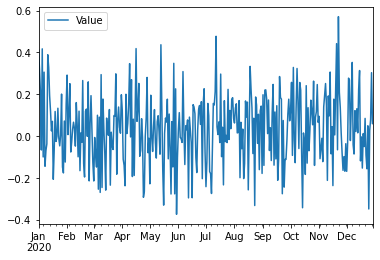

In [247]:
df.plot()

In [248]:
type(df)

pandas.core.frame.DataFrame

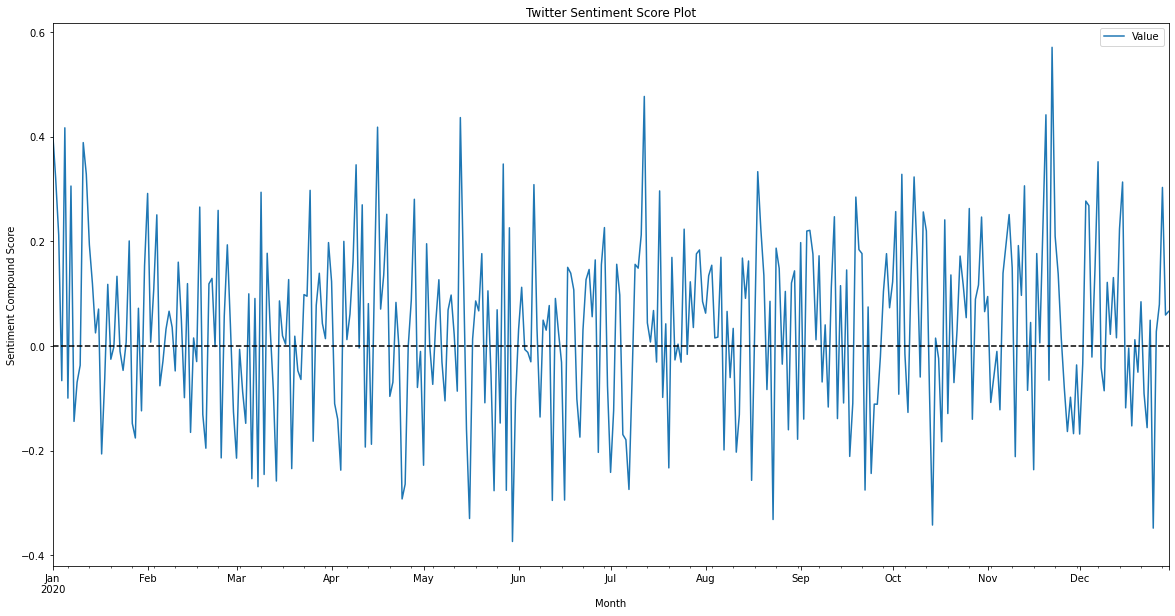

In [249]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)

ax.axhline(y=0, color='black', linestyle='--')  # add a horizontal line at y=0

ax.set_xlabel('Month')
ax.set_ylabel('Sentiment Compound Score')
ax.set_title('Twitter Sentiment Score Plot')

# show the plot
plt.show()

In [250]:
df

,Month,Value
2020-01-01,Month 1,0.410871
2020-01-02,Month 1,0.321271
2020-01-03,Month 1,0.211971
2020-01-04,Month 1,-0.066371
2020-01-05,Month 1,0.416957
...,...,...
2020-12-26,Month 12,0.027329
2020-12-27,Month 12,0.079300
2020-12-28,Month 12,0.302986
2020-12-29,Month 12,0.059071


In [254]:
df.keys()

Index(['Month', 'Value'], dtype='object')

In [261]:
import statsmodels.api as sm

# Convert the list to a Pandas DataFrame with a DatetimeIndex
dates_mon = pd.date_range(start='2020-01-01', end='2020-12-01', freq='MS')
df_mon = pd.DataFrame({'compound score': df['Value']}, index=dates_mon)

# Calculate a rolling mean with a window size of 3
rolling_mean_mon = df_mon['compound score'].rolling(window=2).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle_mon, trend_mon = sm.tsa.filters.hpfilter(df_mon['compound score'], lamb=1600)

print("Rolling Mean:\n", rolling_mean_mon)
print("\nTrend Analysis:\n", trend_mon)

Rolling Mean:
 2020-01-01         NaN
2020-02-01    0.351179
2020-03-01    0.038479
2020-04-01   -0.045721
2020-05-01   -0.052493
2020-06-01   -0.098143
2020-07-01   -0.104957
2020-08-01   -0.089536
2020-09-01    0.130071
2020-10-01    0.160071
2020-11-01    0.108536
2020-12-01   -0.037036
Freq: MS, Name: compound score, dtype: float64

Trend Analysis:
 2020-01-01    0.136604
2020-02-01    0.117717
2020-03-01    0.099002
2020-04-01    0.080738
2020-05-01    0.063009
2020-06-01    0.045926
2020-07-01    0.029419
2020-08-01    0.013405
2020-09-01   -0.002364
2020-10-01   -0.018107
2020-11-01   -0.033918
2020-12-01   -0.049803
Freq: MS, Name: compound score_trend, dtype: float64


<b><i>Rolling Means Analysis -- Short-Term/</i></b>

This rolling mean shows the average sentiment score over a period of time, with each data point representing the average score for the previous 3 months.

For this particular rolling mean, we can see that the sentiment score started off high in February 2020, but then sharply decreased in March and April before stabilizing around a slightly negative sentiment score for the rest of the year.

One interesting point to note is the sudden spike in sentiment score in September and October, which suggests a temporary shift in sentiment towards a more positive outlook, before returning to a slightly negative sentiment score in the final months of the year.

<b><i>Trend Analysis -- Long-Term</i></b>

the trend analysis suggests that the sentiment compound score decreased gradually over the year 2020, with a negative trend. This suggests that there was a decreasing trend in the negativity of anti-Chinese sentiment on Twitter over the year 2020.

In [257]:
df

,Month,Value
2020-01-01,Month 1,0.410871
2020-01-02,Month 1,0.321271
2020-01-03,Month 1,0.211971
2020-01-04,Month 1,-0.066371
2020-01-05,Month 1,0.416957
...,...,...
2020-12-26,Month 12,0.027329
2020-12-27,Month 12,0.079300
2020-12-28,Month 12,0.302986
2020-12-29,Month 12,0.059071


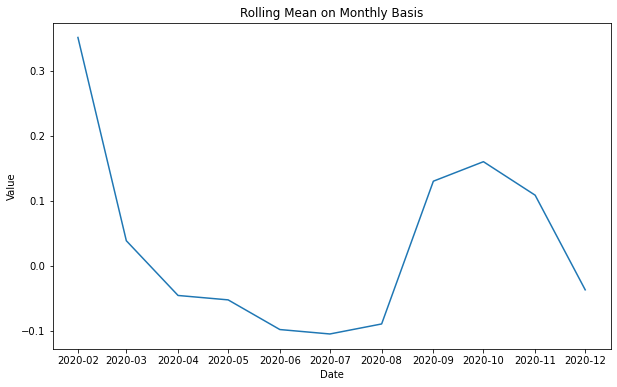

In [264]:
plt.figure(figsize=(10, 6))

plt.plot(rolling_mean_mon.index, rolling_mean_mon.values)
plt.title("Rolling Mean on Monthly Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [262]:
dates = pd.date_range(start='2020-01-01', end='2020-12-01', freq='D')
df_day = pd.DataFrame({'compound score': df['Value']}, index=dates)

rolling_mean_day = df_day['compound score'].rolling(window=3).mean()

# Perform a trend analysis using a Hodrick-Prescott filter
cycle_day, trend_day = sm.tsa.filters.hpfilter(df_day['compound score'], lamb=1600)

print("Rolling Mean:\n", rolling_mean_day)
print("\nTrend Analysis:\n", trend_day)

Rolling Mean:
 2020-01-01         NaN
2020-01-02         NaN
2020-01-03    0.314705
2020-01-04    0.155624
2020-01-05    0.187519
                ...   
2020-11-27   -0.076643
2020-11-28   -0.114262
2020-11-29   -0.143124
2020-11-30   -0.100690
2020-12-01   -0.124176
Freq: D, Name: compound score, Length: 336, dtype: float64

Trend Analysis:
 2020-01-01    0.230048
2020-01-02    0.214957
2020-01-03    0.199980
2020-01-04    0.185295
2020-01-05    0.171089
                ...   
2020-11-27    0.000062
2020-11-28   -0.016292
2020-11-29   -0.032905
2020-11-30   -0.049638
2020-12-01   -0.066434
Freq: D, Name: compound score_trend, Length: 336, dtype: float64


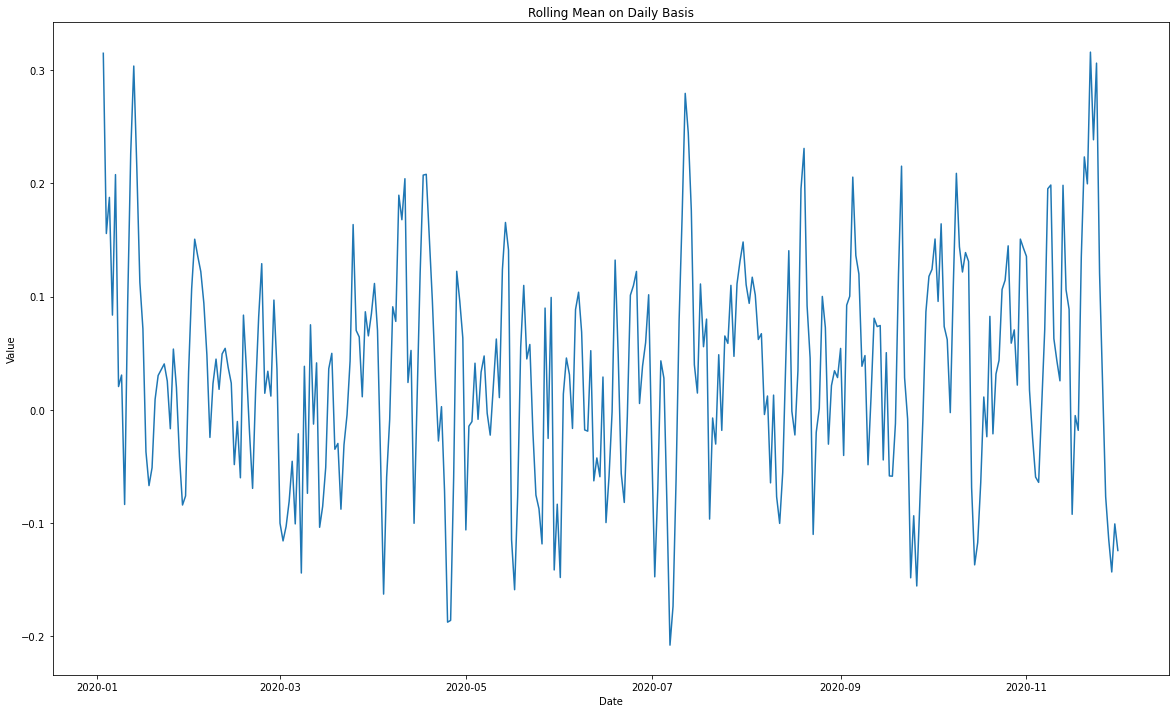

In [265]:
plt.figure(figsize=(20, 12))

plt.plot(rolling_mean_day.index, rolling_mean_day.values)
plt.title("Rolling Mean on Daily Basis")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# Load stock prices data
stock_prices = pd.read_csv('stock_prices.csv', index_col=0, parse_dates=True)

# Merge the tweet data with the stock prices data on the same datetime index
merged_df = pd.merge(dfs_6['2020-06-15'], stock_prices, left_index=True, right_index=True)

# Perform Granger causality test on the merged DataFrame
granger_results = grangercausalitytests(merged_df[['Compound Scores', 'Stock Price']], maxlag=7)